## <span style="color:blue">  Numerical exercises 8</span>

L'obiettivo di questo esercizio è ottimizzare variazionalmente lo stato fondamentale di una singola particella quantistica in uno stato 1D confinata nel potenziale esterno:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Questo modello quantistico non è analiticamente risolvibile e deve essere affrontato con metodi numerici. Per ottenere una funzione d'onda approssimata per lo stato fondamentale il metodo VMC utilizza una funzione d'onda di prova, parametrizzata da un insieme di parametri variazionali.
Un modello approssimato per la funzione d'onda dello stato fondamentale è la funzione d'onda di prova seguente:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ dipende da due parametri variazionali: $\sigma$ e $\mu$.
Essendo il potenziale pari ci si aspetta che la funzione d'onda sia pari, perciò la scelta è ricaduta su una funzione di prova simmetrica.

### Exercise 08.2

Calcolando il valore di aspettazione dell'energia sulla funzione di prova per diversi valori di $\sigma$ e $\mu$ trovo che questo è minimo per $\sigma=0.62$ e $\mu=0.81$.

Di seguito è riportato il valore di aspettazione dell'energia in funzione del numero di blocchi.

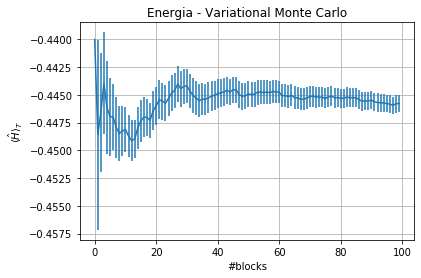

<H> -0.445778 +- 0.000787592


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


N=100         
x = np.arange(N) 
pi=np.pi

data, error =np.loadtxt("es8.1/H.dat", unpack=True, usecols = (0,1)) 
plt.errorbar(x,data, yerr=error)
plt.title('Energia - Variational Monte Carlo')
plt.xlabel('#blocks')
plt.ylabel(r'$\langle {\hat H} \rangle_T$')
plt.grid(True)

plt.show()

print('<H>',data[99],'+-',error[99])

Grafico i punti campionati secondo la densità di probabilità $|\Psi_T(x)|^2$, quindi confronto l'istogramma con la curva analitica di $|\Psi_T(x)|^2$ e con la soluzione numerica.

Ground state energy:  -0.460465879692715
1st excited state energy:  0.09742471331761034
2nd excited state energy:  1.9717331343930202


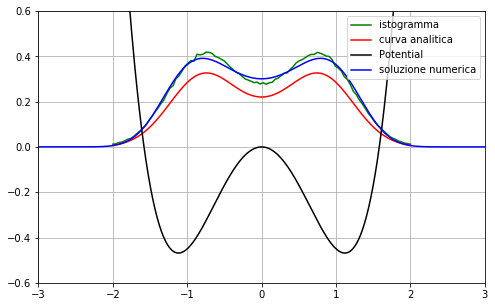

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


N1=100         
plt.figure(figsize=(8,5))
x1 = np.linspace(-2, 2., N1)
data=np.loadtxt("es8.1/istogramma.dat") 
plt.plot(x1,data/40000, color="Green", label='istogramma')
sigma=0.62

#plt.figure()
def psiT(y):
    sigma=0.62
    mu=0.81
    a1=((y-mu)/sigma)**2
    a2=((y+mu)/sigma)**2
    return np.exp(-a1/2)+np.exp(-a2/2)
pi=np.pi

f = psiT(x1)
norma=3*sigma*np.sqrt(pi)
plt.plot(x1,f*f/norma, color="Red", label='curva analitica')

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])


# Plot a few things
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, color="Blue", label="soluzione numerica")
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.grid(True)

plt.show()


### Exercise 08.3

I codici PIMC/PIGS consentono di risolvere in modo quasi esatto il sistema quantistico.

Di seguito vengono confrontati i risultati ottenuti con il codice PIGS con quelli ottenuti con il codice VMC.

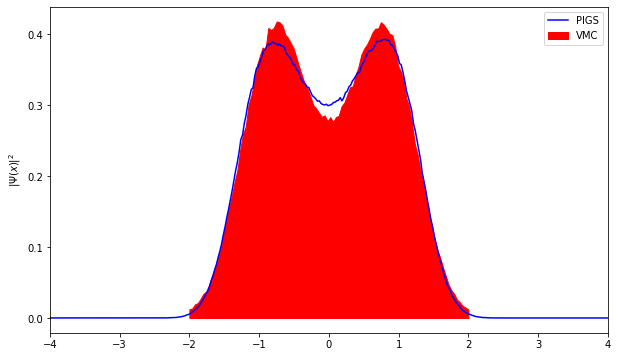

In [3]:
import pylab
x0, data0=np.loadtxt("es8.3/QMC_1D/probability_psiT_8.dat", unpack=True, usecols = (0,1))
x4 = np.linspace(-2, 2., N1)
isto=np.loadtxt("es8.1/istogramma.dat") 
pylab.figure(figsize=(10,6))
plt.xlim((-4,4))
pylab.plot(x0, data0, color='blue', label='PIGS')
plt.ylabel(r'$|\Psi(x)|^2$')
plt.fill_between(x4,isto/40000, color='red', label='VMC')
plt.legend()
plt.show()

Il codice PIGS si basa sulla proiezione di una funzione d'onda di prova sul vero stato fondamentale. Maggiore è la somiglianza della funzione d'onda di prova con quella vera,minore sarà il tempo di propagazione immaginario necessario ad ottenere risultati accurati. 

Di seguito mostro i risultati ottenuti utilizzando le funzioni:
* $\Psi_T(x)=1$
* $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$


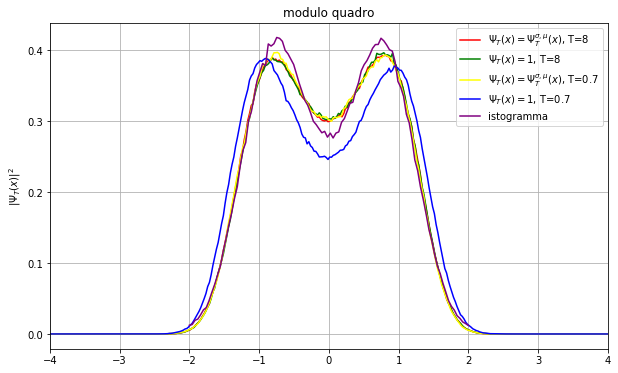

In [4]:

x0, data0=np.loadtxt("es8.3/QMC_1D/probability_psiT_8.dat", unpack=True, usecols = (0,1))
x1, data1=np.loadtxt("es8.3/QMC_1D/probability_psi1_8.dat", unpack=True, usecols = (0,1))
x2, data2=np.loadtxt("es8.3/QMC_1D/probability_psiT_0.7", unpack=True, usecols = (0,1))
x3, data3=np.loadtxt("es8.3/QMC_1D/probability_psi1_0.7.dat", unpack=True, usecols = (0,1))

x4 = np.linspace(-2, 2., N1)
data4=np.loadtxt("es8.1/istogramma.dat") 

pylab.figure(figsize=(10,6))
pylab.plot(x0, data0, color='Red', label='$\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$, T=8')
pylab.plot(x1, data1, color='Green', label='$\Psi_T(x)=1$, T=8')
pylab.plot(x2, data2, color='Yellow', label='$\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$, T=0.7')
pylab.plot(x3, data3, color='Blue', label='$\Psi_T(x)=1$, T=0.7')
pylab.plot(x4, data4/40000, color='Purple', label='istogramma')

pylab.legend(loc='upper right')

plt.title('modulo quadro')
plt.xlim((-4,4))
plt.ylabel(r'$|\Psi_T(x)|^2$')
plt.grid(True)

plt.show()

Osservo che la funzione d'onda ottimizzata mi consente di ottenere risultati accurati anche con un tempo di propagazione immaginario T<1, mentre per ottenere risultati altrettanto buoni con la funzione costante $\Psi_T(x) = 1$ è necessario un tempo di propagazione più lungo.

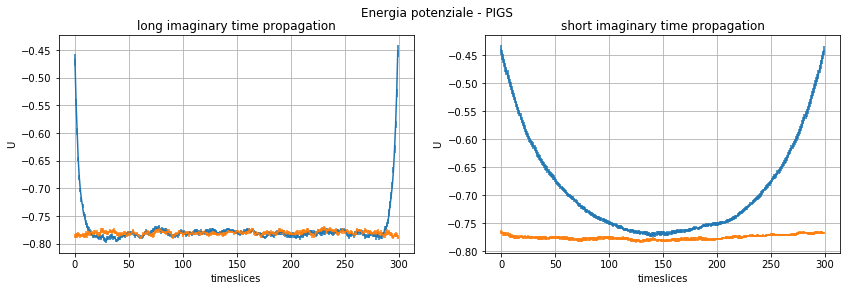

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
x,data, error =np.loadtxt("es8.3/QMC_1D/potential_psi1_8.dat", unpack=True, usecols = (0,1,2)) 
x1,data1, error1 =np.loadtxt("es8.3/QMC_1D/potential_psiT_8.dat", unpack=True, usecols = (0,1,2)) 
x2,data2, error2 =np.loadtxt("es8.3/QMC_1D/potential_psi1_0.7.dat", unpack=True, usecols = (0,1,2)) 
x3,data3, error3 =np.loadtxt("es8.3/QMC_1D/potential_psiT_0.7.dat", unpack=True, usecols = (0,1,2)) 
ax1.errorbar(x,data, yerr=error)
ax1.errorbar(x1,data1, yerr=error1)
ax1.set(xlabel='timeslices', ylabel='U')
ax1.grid(True)
ax1.set_title('long imaginary time propagation')
ax2.errorbar(x2,data2, yerr=error2)
ax2.errorbar(x3,data3, yerr=error3)
ax2.set(xlabel='timeslices', ylabel='U')
ax2.set_title('short imaginary time propagation')
ax2.grid(True)

fig.suptitle('Energia potenziale - PIGS')
plt.show()

Di sopra vengono confrontati i valori dell'energia potenziale in funzione della timeslice calcolati utilizzando le due diverse funzioni d'onda di prova. Per tempi di propagazione sufficientemente lunghi si osserva che i valori calcolati coincidono su un intervallo molto ampio, mentre per tempi di propagazione brevi i valori dell'energia potenziale sono confrontabili sono su un intervallo molto stretto nella zona centrale.

Eseguo infine delle simulazioni a T finita per osservare come cambiano i risultati all'aumentare della temperatura.

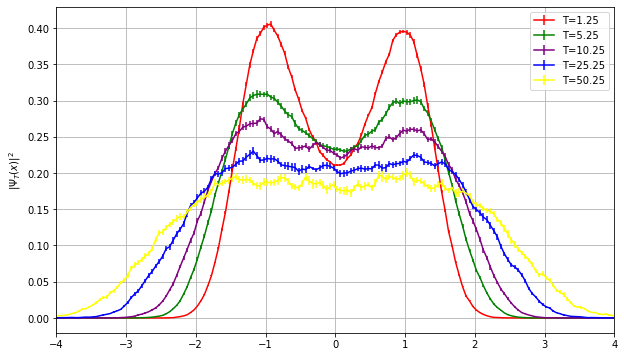

In [6]:
import pylab

x0, data0, error0=np.loadtxt("es8.3/simulazioniTfinita/probability_psiT_1.25", unpack=True, usecols = (0,1,2)) 
x1, data1, error1=np.loadtxt("es8.3/simulazioniTfinita/probability_psiT_5.25", unpack=True, usecols = (0,1,2))
x2, data2, error2=np.loadtxt("es8.3/simulazioniTfinita/probability_psiT_10.25", unpack=True, usecols = (0,1,2)) 
x3, data3, error3=np.loadtxt("es8.3/simulazioniTfinita/probability_psiT_25.25", unpack=True, usecols = (0,1,2))
x4, data4, error4=np.loadtxt("es8.3/simulazioniTfinita/probability_psiT_50.25", unpack=True, usecols = (0,1,2))
 
pylab.figure(figsize=(10,6))
pylab.errorbar(x0, data0, yerr=error0, color='Red', label='T=1.25')
pylab.errorbar(x1, data1,yerr=error1, color='Green', label='T=5.25')
pylab.errorbar(x2, data2,yerr=error2, color='Purple', label='T=10.25')
pylab.errorbar(x3, data3,yerr=error3, color='Blue', label='T=25.25')
pylab.errorbar(x4, data4,yerr=error4, color='Yellow', label='T=50.25')


pylab.legend(loc='upper right')


plt.xlim((-4,4))
plt.ylabel(r'$|\Psi_T(x)|^2$')
plt.grid(True)

plt.show()